In [1]:
import numpy as np
import pandas as pd


In [2]:
data= pd.read_csv('Z:\pizza_price_prediction_5thquestion.csv')
data

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [10]:
count_null = data.isnull().sum().sum()
count_null

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_cad        129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# b)	Calculate average price of pizza prepared by each company.

In [12]:
data['price'] = [int(i[1:]) for i in data['price_cad']] # for removing $ symbol from price
data.groupby('company')['price'].mean()

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price, dtype: float64

# c)	Find the companies, who prepared pizzas with different variants with same diameter.

In [13]:
data.groupby(['company','diameter']).filter(lambda x : x['variant'].nunique()>1)
# group by each company and diameter ,filtering the 

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22
5,A,$20,18.5 inch,black_papper,american_favorite,jumbo,no,no,yes,20
6,A,$18,16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes,18
...,...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes,11
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes,14
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes,17
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes,12


# d)	Which company has more pizzas? Show the result with graph.

Text(0.5, 1.0, 'company vs no.of pizzas')

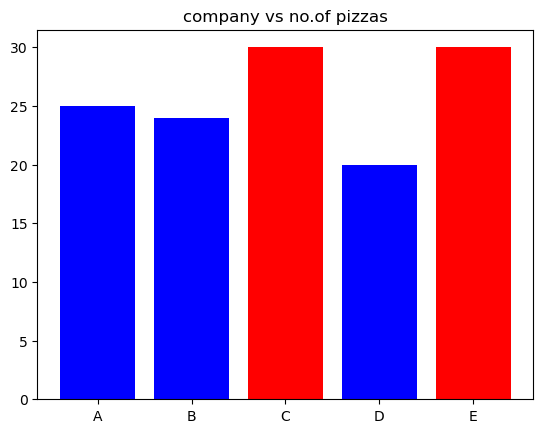

In [15]:
import matplotlib.pyplot as plt
d1=data.groupby('company')['variant'].count()
maxi= d1.max()
graph=['red' if i==maxi else 'blue' for i in d1]
plt.bar(d1.index,d1,color=graph)
plt.title("company vs no.of pizzas")

# e)	Check whether the pizza data set contains null value or not. /Count the no. of null values in the pizza dataset./ Find the number of missing data points per column.

In [16]:
data.isnull().sum()

company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
price              0
dtype: int64

# f)Rename the column price_cad as price.

In [19]:
data.rename(columns={'price':'price_cad','price_cad':'price'},inplace=True)


In [18]:
data

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price_cad
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no,25
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30
...,...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes,11
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes,14
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes,17
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes,12


# g)	Identify the number of companies in each category 

In [23]:
data.groupby('variant')['company'].unique()

variant
BBQ_meat_fiesta         [C, E]
BBQ_sausage                [C]
american_classic           [C]
american_favorite          [A]
classic              [B, D, E]
crunchy              [B, D, E]
double_decker        [B, D, E]
double_mix              [A, D]
double_signature           [A]
extravaganza               [C]
gournet_greek              [C]
italian_veggie             [C]
meat_eater                 [C]
meat_lovers             [A, D]
neptune_tuna               [C]
new_york             [B, D, E]
spicy tuna                 [E]
spicy_tuna                 [C]
super_supreme              [A]
thai_veggie                [C]
Name: company, dtype: object

# h)	Identify which type of pizza is more expensive.

In [24]:
data[data['price']==max(data['price'])]

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30


# i)	Find diameter of each jumbo size pizza.